In [205]:
# Import necessary libraries
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [206]:

# Create a list of tuples containing the user_id, item_id, and view_count for each record

data = [
    (1, 1, 'item 1 description', 2),
    (1, 2, 'item 2 description', 3),
    (1, 3, 'item 3 description', 1),
    (1, 4, 'item 4 description', 5),
    (1, 5, 'item 5 description', 1),
    (2, 1, 'item 1 description', 3),
    (2, 2, 'item 2 description', 2),
    (2, 3, 'item 3 description', 4),
    (2, 4, 'item 4 description', 1),
    (2, 5, 'item 5 description', 5),
    (3, 1, 'item 1 description', 1),
    (3, 2, 'item 2 description', 5),
    (3, 3, 'item 3 description', 2),
    (3, 4, 'item 4 description', 3),
    (3, 5, 'item 5 description', 4),
    (4, 1, 'item 1 description', 4),
    (4, 2, 'item 2 description', 1),
    (4, 3, 'item 3 description', 3),
    (4, 4, 'item 4 description', 2),
    (4, 5, 'item 5 description', 5),
    (5, 1, 'item 1 description', 5),
    (5, 2, 'item 2 description', 4),
    (5, 3, 'item 3 description', 1),
    (5, 4, 'item 4 description', 2),
    (5, 5, 'item 5 description', 3)
]

# Create a dataframe from the data

# Create a dataframe from the data
df = pd.DataFrame(data, columns=['user_id', 'item_id', 'description', 'view_count'])
# Create a pivot table to calculate the number of times each item was viewed by each user

views = pd.pivot_table(df, values='view_count', index='item_id', columns='user_id')


In [216]:
model = NearestNeighbors(metric='cosine')

# Use the TfidfVectorizer to transform the item descriptions into numerical vectors
vectorizer = TfidfVectorizer()
item_descriptions = df.groupby('item_id')['description'].apply(lambda x: x.str.cat(sep=' '))
vectors = vectorizer.fit_transform(item_descriptions)
model.fit(vectors)

NearestNeighbors(metric='cosine')

In [221]:
# Create a function that takes an item_id and returns a list of the 10 most similar items
def get_similar_items(item_id):
    # Get the item vector for the given item
    item_vector = vectors[item_id - 1]
    # Find the 5 nearest neighbors of the item vector
    distances, indices = model.kneighbors(item_vector.reshape(1, -1), n_neighbors=5)
    similar_items = []
    for i in range(1, len(distances.flatten())):
        similar_items.append((indices.flatten()[i], distances.flatten()[i]))
    return similar_items



# Create a function that takes a user_id and a dataframe and returns a list of recommended items
def get_recommendations(user_id, df):
    # Create a dictionary to store the recommended items and their scores
    recommendations = defaultdict(int)
    # Create a pivot table to calculate the items viewed by each user
    items_viewed = pd.pivot_table(df, values='item_id', index='user_id', columns='view_count')

    # Loop through the items_viewed dataframe and create a dictionary that maps each user to a list of items they have viewed
    users_items = {}
    for user_id, user_data in items_viewed.iterrows():
        items = []
        for item_id, view_count in user_data.items():
            if not np.isnan(view_count):
                items.append(item_id)
        users_items[user_id] = items

    # Loop through the items that the user has viewed and calculate the similarity of each item to other items
    for item in users_items[user_id]:
        # Get the 10 most similar items to the current item
        similar_items = get_similar_items(item)
        for similar_item, similarity in similar_items:
            # Only consider items that the user hasn't viewed
            if similar_item not in users_items[user_id]:
                # Add the similarity score to the total score for the item
                recommendations[similar_item] += similarity

    # Sort the recommendations by their total similarity scores and return the list of recommended items
    return sorted(recommendations, key=recommendations.get, reverse=True)


In [222]:
recommendations = get_recommendations(1,df)

In [225]:
#recommendations

In [224]:
for item, score in recommendations:
    print(f'Item: {item}, Score: {score}')

<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_cou

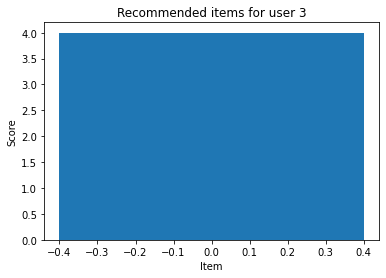

In [46]:
import matplotlib.pyplot as plt
# Get the recommendations for user 3
recommendations = get_recommendations(3)

# Get the item names and scores
item_names = [item[0] for item in recommendations]
scores = [item[1] for item in recommendations]

# Create the bar chart
plt.bar(item_names, scores)

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Score')
plt.title('Recommended items for user 3')

# Show the plot
plt.show()


<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_count in similar_user_viewed_items.iteritems():
<ipython-input-43-37168a935153>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for similar_item, view_cou

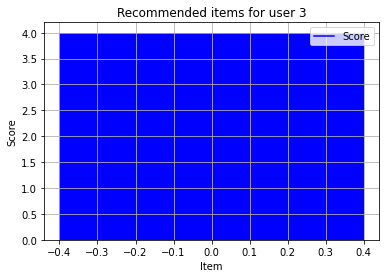

In [47]:
recommendations = get_recommendations(3)

# Get the item names and scores
item_names = [item[0] for item in recommendations]
scores = [item[1] for item in recommendations]

# Create the bar chart
plt.bar(item_names, scores, color=['b', 'g', 'r', 'c', 'm', 'y', 'k', '#ffa500', '#ee82ee', '#a52a2a'])

# Add a grid to the chart
plt.grid(True)

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Score')
plt.title('Recommended items for user 3')

# Add a legend to explain the scores
plt.plot(np.nan, 'b', label='Score')
plt.legend()

# Show the plot
plt.show()